<a href="https://colab.research.google.com/github/GianeBas/Hidrolog-a/blob/main/ECUACI%C3%93N%20DE%20REGRESI%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tensorflow")
install.packages("numpy")
install.packages("math")
install.packages("matplotlib.pyplot")
install.packages("numpy.random")

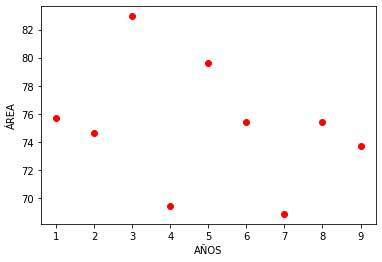

Epoch: 0001 cost= 740.776306152 W= 7.85545 b= 4.121539
Epoch: 0002 cost= 708.305725098 W= 7.7140903 b= 5.617482
Epoch: 0003 cost= 680.002258301 W= 7.5490274 b= 7.076964
Epoch: 0004 cost= 652.851989746 W= 7.3872566 b= 8.506588
Epoch: 0005 cost= 626.799682617 W= 7.2287927 b= 9.906984
Epoch: 0006 cost= 601.800659180 W= 7.0735693 b= 11.278749
Epoch: 0007 cost= 577.812622070 W= 6.9215183 b= 12.622468
Epoch: 0008 cost= 554.794555664 W= 6.7725763 b= 13.938714
Epoch: 0009 cost= 532.707031250 W= 6.62668 b= 15.228049
Epoch: 0010 cost= 511.512603760 W= 6.483767 b= 16.491022
Epoch: 0011 cost= 491.175140381 W= 6.3437743 b= 17.728178
Epoch: 0012 cost= 471.659881592 W= 6.2066445 b= 18.940037
Epoch: 0013 cost= 452.933624268 W= 6.072319 b= 20.12712
Epoch: 0014 cost= 434.964538574 W= 5.940739 b= 21.289932
Epoch: 0015 cost= 417.721771240 W= 5.81185 b= 22.428974
Epoch: 0016 cost= 401.176147461 W= 5.685595 b= 23.544727
Epoch: 0017 cost= 385.299468994 W= 5.561921 b= 24.63767
Epoch: 0018 cost= 370.064544678 

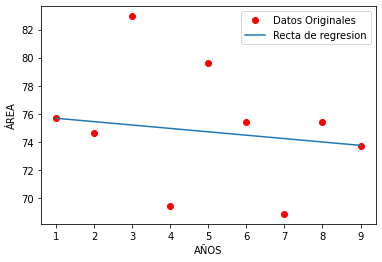

In [55]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy
import math
import matplotlib.pyplot as plt
rng = numpy.random
gradiente_aprendizaje = 0.1
iteraciones= 205
display_step = 1
meses = 9
train_X = numpy.asarray([1,2,3,4,5,6,7,8,9])
train_Y = numpy.asarray([75.717,74.634,82.95,69.4224,79.634,75.4416,68.8681,75.4397,73.717])
n_samples = train_X.shape[0] 
plt.plot(train_X, train_Y, "ro") 
plt.xlabel("AÑOS")
plt.ylabel("ÁREA")
plt.show()
#Creamos los Placeholders
X = tf.placeholder("float", name="anual")
Y = tf.placeholder("float", name="sup")

# Creamos las variables de entreno
W = tf.Variable(rng.randn(), name="peso")
b = tf.Variable(rng.randn(), name="parciales")

# Construimos el modelo lineal
pred = tf.add(tf.multiply(X, W), b)

# Calculamos la media del error cuadrado
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

#  Calculamos el descenso de gradiente
optimizer = tf.train.GradientDescentOptimizer(gradiente_aprendizaje).minimize(cost)

# Inicializamos las variables
init = tf.global_variables_initializer()
with tf.Session() as sess:

    # ejecutamos el inicializador
    sess.run(init)
# Ajustamos datos de entrenamiento
    for epoch in range(iteraciones):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
# Mostramos en pantalla los registros por cada paso (log)
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    print("Optimización finalizada!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
# Mostramos resultados
    plt.plot(train_X, train_Y, 'ro', label='Datos Originales')
    plt.xlabel("AÑOS")
    plt.ylabel("ÁREA")
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Recta de regresion')
    plt.legend()
    plt.show()